In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#202331016_Nanda Revan Saputro

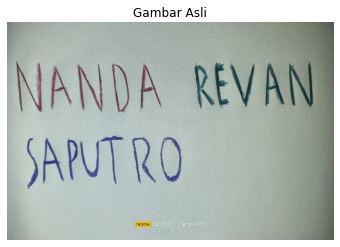

In [52]:
# Load gambar dan resize agar lebih kecil
image = cv2.imread('tulisan7.jpg')
resized_image = cv2.resize(image, (600, 400))

# Konversi ke RGB untuk visualisasi
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.title("Gambar Asli")
plt.axis('off')
plt.show()

#202331016_Nanda Revan Saputro

## Kategori Ambang Batas 202331016_Nanda Revan Saputro

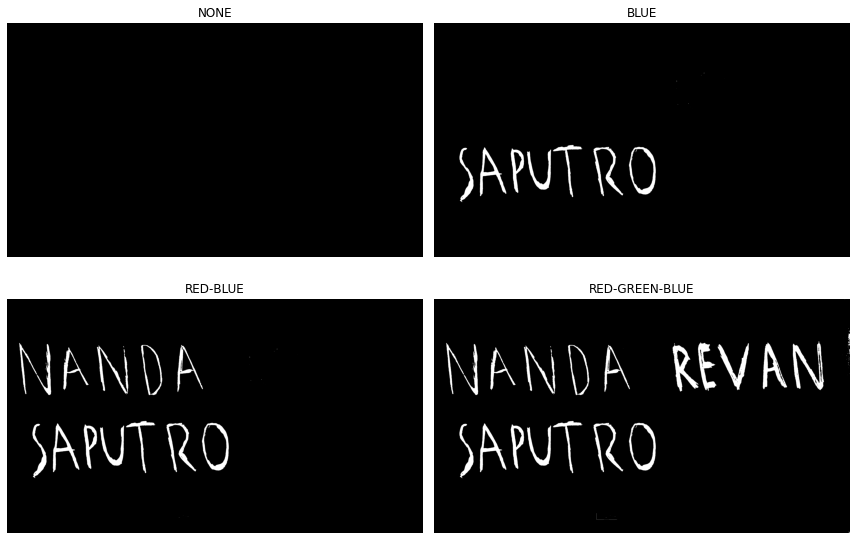

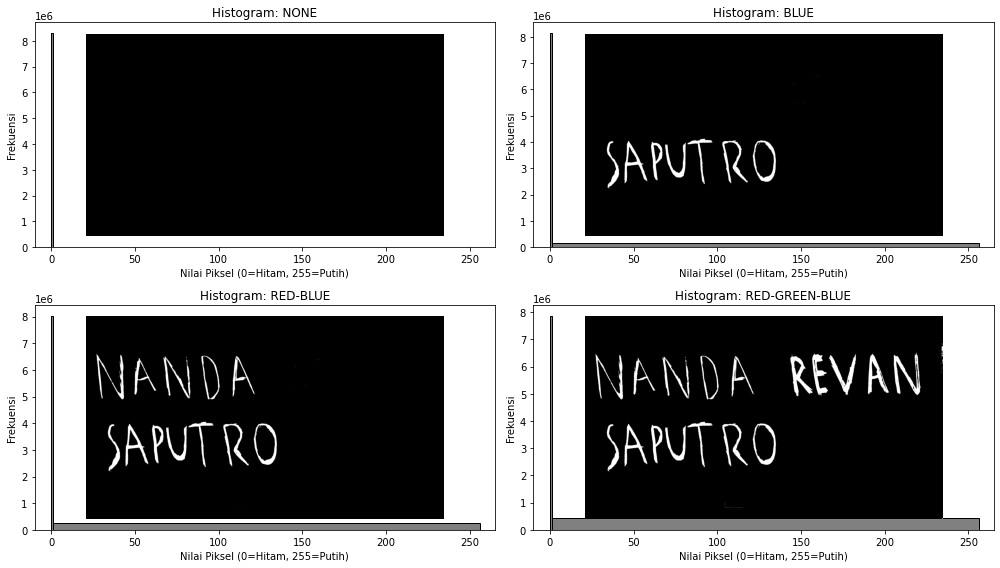

In [97]:
# 1. Baca & konversi ke RGB + HSV
img_bgr = cv2.imread('tulisan7.jpg')
if img_bgr is None:
    raise FileNotFoundError("tulisan7.jpg tidak ditemukan!")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
hsv     = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# 2. Definisi rentang HSV untuk tiap warna
ranges = {
    'blue':  (np.array([100, 50, 50]),  np.array([140, 255, 255])),
    'green': (np.array([ 30, 40, 40]),  np.array([100, 255, 255])),
    'red1':  (np.array([  0, 50, 50]),  np.array([ 10, 255, 255])),
    'red2':  (np.array([160, 50, 50]),  np.array([180, 255, 255])),
}

# 3. Buat mask untuk masing‑masing warna
mask_blue  = cv2.inRange(hsv, *ranges['blue'])
mask_green = cv2.inRange(hsv, *ranges['green'])
mask_red   = cv2.inRange(hsv, *ranges['red1']) | cv2.inRange(hsv, *ranges['red2'])

# 4. Siapkan kombinasi mask sesuai kategori
mask_none       = np.zeros_like(mask_blue)                          # NONE
mask_only_blue  = mask_blue                                         # BLUE
mask_red_blue   = (mask_red > 0) | (mask_blue > 0)                  # RED‑BLUE
mask_all_colors = (mask_red > 0) | (mask_green > 0) | (mask_blue > 0)  # RED‑GREEN‑BLUE

masks = [
    ('NONE',        mask_none),
    ('BLUE',        mask_only_blue),
    ('RED‑BLUE',    mask_red_blue.astype(np.uint8)*255),
    ('RED‑GREEN‑BLUE', mask_all_colors.astype(np.uint8)*255),
]

# 5. Fungsi untuk membuat output binary: putih untuk mask, hitam untuk lainnya
def apply_binary(mask):
    # mask sudah 0/255; langsung tampilkan sebagai grayscale
    return mask

# 6. Plot 2×2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, (title, mask) in zip(axes, masks):
    out = apply_binary(mask)
    ax.imshow(out, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

# 7. Plot histogram dari mask dengan inset besar
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for (title, mask), (r, c) in zip(masks, positions):
    ax = axs[r][c]
    
    # Histogram dari nilai 0 dan 255
    ax.hist(mask.ravel(), bins=[0, 1, 256], color='gray', edgecolor='black')
    ax.set_title(f'Histogram: {title}')
    ax.set_xlabel('Nilai Piksel (0=Hitam, 255=Putih)')
    ax.set_ylabel('Frekuensi')
    ax.set_xlim([-10, 265])
    
    # Inset besar untuk tampilan mask-nya
    axins = ax.inset_axes([0.05, 0.05, 0.9, 0.9])
    axins.imshow(mask, cmap='gray', vmin=0, vmax=255)
    axins.axis('off')
plt.tight_layout()
plt.show()
#202331016_Nanda Revan Saputro

## Histogram

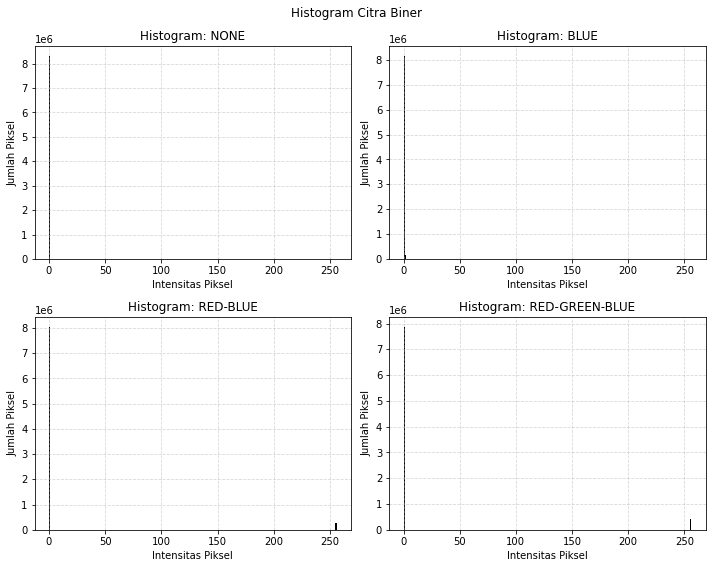

In [92]:
# Plot 2×2 histogram
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))
axes2 = axes2.ravel()
for ax, (title, mask) in zip(axes2, masks):
    ax.hist(mask.ravel(), bins=256, range=(0,256), color='black')
    ax.set_title(f"Histogram: {title}")
    ax.set_xlabel('Intensitas Piksel')
    ax.set_ylabel('Jumlah Piksel')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Histogram Citra Biner")
plt.tight_layout()
plt.show()

#202331016_Nanda Revan Saputro